# mmdsoil
Detect fractures in soil.

# Description

The input-image is a gray-scale image of soil that has some thin fractures. These fractures are detected by the application of the top-hat and area open operators.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt
print(ia.__version__)

ia870 Python Morphology Toolbox version 0.8 25th Aug 2014 - in progress - migrating to Python 3


# Reading

The gray-scale image of the ruler is read. 

(-0.5, 308.5, 255.5, -0.5)

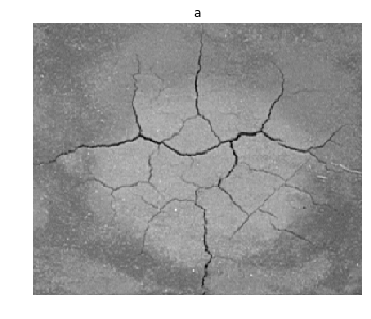

In [2]:
a_pil = Image.open('data/soil.tif').convert('L')
a = np.array (a_pil)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Fractures enhancement

The fracture lines are enhanced by the close top-hat operator. 

(-0.5, 308.5, 255.5, -0.5)

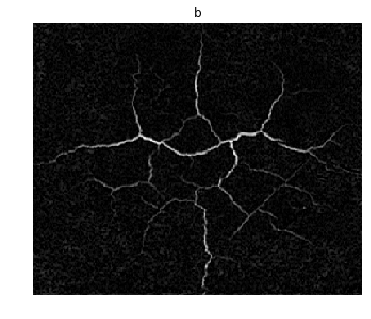

In [3]:
b = ia.iacloseth(a,ia.iasebox(2))

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('b')
axes.imshow(b, cmap='gray')
axes.axis('off')

## Gray-scale area open

Small connected bright regions are removed by the gray-scale area open operator. Note the connectivity used ( mmsebox : 8-connected). 

(-0.5, 308.5, 255.5, -0.5)

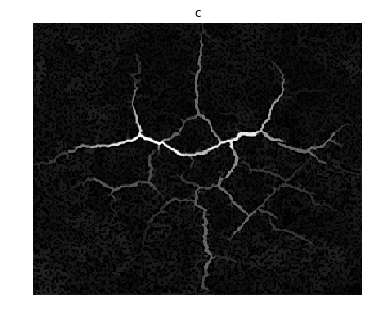

In [4]:
c = ia.iaareaopen(b,80,ia.iasebox())

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('c')
axes.imshow(c, cmap = 'gray')
axes.axis('off')

# Thresholding

The fracture lines are detected. This threshold is very robust. 

(-0.5, 308.5, 255.5, -0.5)

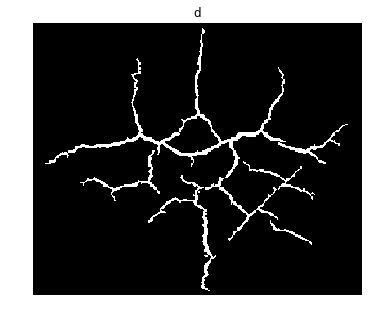

In [5]:
d = ia.iathreshad(c,15)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('d')
axes.imshow(d, cmap='gray')
axes.axis('off')

# Final display

Overlay of the fracture lines over the original image. 

(-0.5, 308.5, 255.5, -0.5)

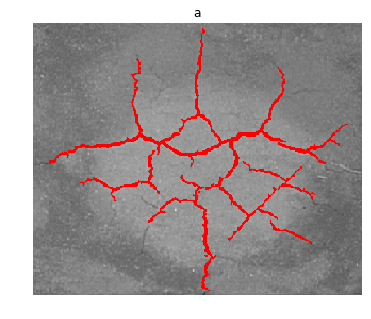

In [6]:
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(ia.iagshow(a, d).transpose (1, 2, 0))
axes.axis('off')